# Comprendre le chômage en France 

Vous êtes vous déjà demandé d'où sortaient les chiffres qu'annoncent les politiques ou les media lorsqu'ils parlent de chômage. Etant un sujet d'intérêt dans les pays occidents, tentons de comprendre ce qu'ils se passent en termes de chômages en France. Pour cela, nous avons récupéré des données sur [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). Elles représentent les données du chômage en France en 2017



## Documentation du dataset 

Regarder la documentation du dataset [ici](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Allez sur le lien suivant : [Dataset](https://www.insee.fr/fr/statistiques/3555153#consulter) et téléchargez le petit dataset de 9Mo. 

* En utilisant la commande `!unzip filename.zip` dézippez le fichier que vous avez téléchargé 

Archive:  fd_eec17_dbase.zip
  inflating: fdeec17.dbf             
  inflating: varlist.dbf             
  inflating: varmod.dbf              


* Importez les librairies 
  * pandas 
  * numpy 

In [3]:
import pandas as pd
import numpy as np

* Nous allons avoir besoin d'installer une librairie sur notre notebook pour pouvoir lire les fichiers. Utilisez la commande suivante : 

`!pip install simpledbf`

  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp36-none-any.whl size=13794 sha256=10890fb3b56b178a18a061437e544a8700e562127088dbf92d3adbff39131dd2
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built simpledbf


* Appliquez ensuite le code suivant : 

```
from simpledbf import Dbf5
dataset = Dbf5("fdeec17.dbf").to_dataframe()
dataset.head()
```

In [110]:
chomage_df = pd.read_csv("fdeec17.csv", index_col=0)

In [7]:
chomage_df.head()

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2017,1,1,1,2,50,50,2,1,1.0,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,2017,1,1,1,2,15,15,2,2,1.0,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2017,1,1,1,2,15,15,2,2,1.0,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,2017,3,1,1,2,50,50,2,1,1.0,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,2017,3,1,1,2,15,15,2,2,1.0,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


In [8]:
chomage_df.shape

(428642, 125)

In [9]:
chomage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428642 entries, 0 to 428641
Columns: 125 entries, ANNEE to NBTOTE
dtypes: float64(106), int64(13), object(6)
memory usage: 412.1+ MB


* Importez `matplotlib`

In [10]:
import matplotlib.pyplot as plt

* En faisant un [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), montrez la part de chômeurs, d'inactifs et d'actifs occupés en France à partir de la variable ACTEU. Faites attention de faire apparaitre : 

  * Le pourcentage de chaque partie 
  * Une légende 

In [230]:
chomage_df['ACTEU'].unique()

array([ 1.,  3.,  2., nan])

In [34]:
# plus simple d'effectuer un apply pour les labels et d'utiliser la méthode value_counts() pour les sizes
pie_df = pd.DataFrame()
pie_df["labels"] = ["Actif Occupé", "Chômeur", "Inactif", "NAN"]
pie_df["sizes"] = [
    chomage_df[chomage_df["ACTEU"] == 1]["ACTEU"].shape[0],
    chomage_df[chomage_df["ACTEU"] == 2]["ACTEU"].shape[0],
    chomage_df[chomage_df["ACTEU"] == 3]["ACTEU"].shape[0],
    chomage_df[chomage_df["ACTEU"].isnull()]["ACTEU"].shape[0]
]

display(pie_df)

,labels,sizes
0,Actif Occupé,198054
1,Chômeur,21864
2,Inactif,207520
3,NAN,1204


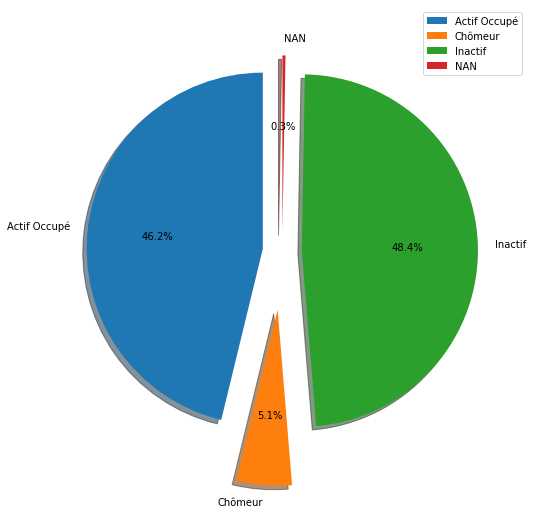

In [239]:
plt.figure(figsize=(9,9))
plt.pie(pie_df["sizes"], labels=pie_df["labels"], 
        autopct='%1.1f%%', 
        explode=[.1, .3, .1, .1], 
        startangle=90, 
        radius=.9,
        shadow=True)
plt.legend(loc='upper right')
plt.show()

---> Le chiffre du chômage semble bas et, si on regarde l'explication des *inactifs*, celle-ci semble inclure beaucoup de monde (étudiants, personne ne cherchant pas d'emploi etc.)

* Faites le même graphique sur la variable ACTEU6 qui est plus précise sur le type d'actifs 

In [54]:
# plus simple d'effectuer un apply pour les labels et d'utiliser la méthode value_counts() pour les sizes
pie_acteu6_df = pd.DataFrame()
pie_acteu6_df["labels"] = [
    "Actif Occupé", 
    "Chômeur PSERE", 
    "Autre Chômeur BIT", 
    "Etudiant, élève, stagiaire en formation", 
    "Autres inactifs (dont retraité)", 
    "NAN"
]
pie_acteu6_df["sizes"] = [
    chomage_df[chomage_df["ACTEU6"] == 1]["ACTEU6"].shape[0],
    chomage_df[chomage_df["ACTEU6"] == 3]["ACTEU6"].shape[0],
    chomage_df[chomage_df["ACTEU6"] == 4]["ACTEU6"].shape[0],
    chomage_df[chomage_df["ACTEU6"] == 5]["ACTEU6"].shape[0],
    chomage_df[chomage_df["ACTEU6"] == 6]["ACTEU6"].shape[0],
    chomage_df[chomage_df["ACTEU6"].isnull()]["ACTEU6"].shape[0]
]
display(pie_acteu6_df)

,labels,sizes
0,Actif Occupé,198054
1,Chômeur PSERE,20854
2,Autre Chômeur BIT,1010
3,"Etudiant, élève, stagiaire en formation",34599
4,Autres inactifs (dont retraité),172921
5,NAN,1204


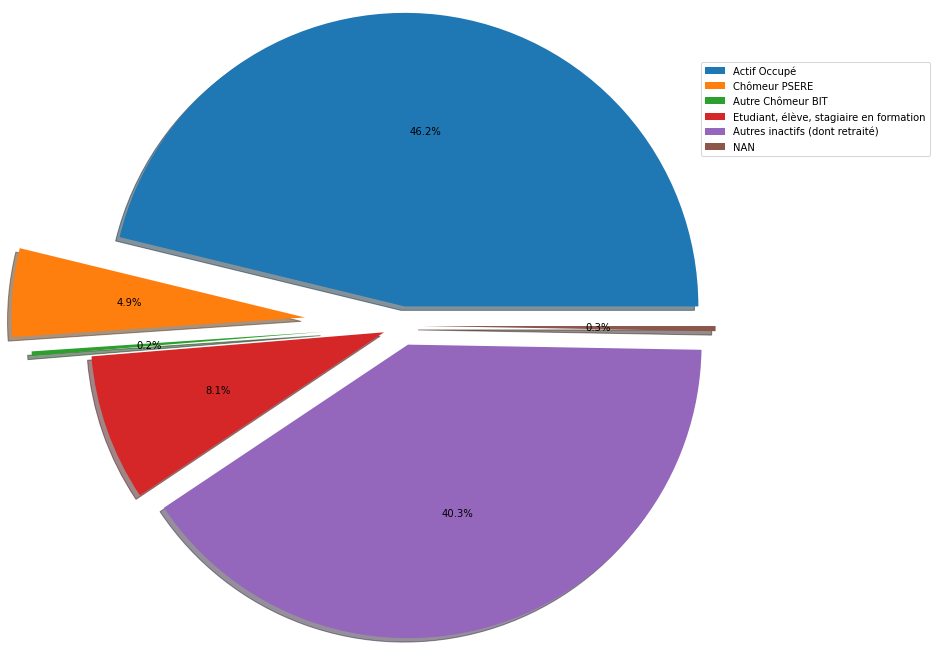

In [246]:
plt.figure(figsize=(9,9))
plt.pie(pie_acteu6_df["sizes"], 
        autopct='%1.1f%%', 
        explode=[.1, .5, .4, .1, .1, .1],
        shadow=True,
        radius=1.5)
plt.legend(pie_acteu6_df["labels"], bbox_to_anchor=(1.1, 1.05))
plt.show()

* En créant un [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), comparez :

  * le rapport *chômeurs* / *Actifs occupés* 
  * Le rapport *chômeurs* / *Actifs occupés + Inactifs*

In [59]:
stacked_bar_df = pie_df
stacked_bar_df

,labels,sizes
0,Actif Occupé,198054
1,Chômeur,21864
2,Inactif,207520
3,NAN,1204


In [91]:
# On crée les rapports Chômeurs / Actifs occupés ET Chômeurs / (Actifs occupés + Inactifs)
inactive_rate = stacked_bar_df.loc[stacked_bar_df["labels"] == "Chômeur", "sizes"].sum() / \
stacked_bar_df.loc[stacked_bar_df["labels"] == "Actif Occupé", "sizes"].sum()
inactive_rate = [
    inactive_rate, 
    stacked_bar_df.loc[stacked_bar_df["labels"] == "Chômeur", "sizes"].sum() / \
    stacked_bar_df.loc[(stacked_bar_df["labels"] == "Actif Occupé") | (stacked_bar_df["labels"] == "Inactif"), "sizes"].sum()
]
inactive_rate

[0.11039413493289708, 0.05390878113488537]

In [92]:
# On crée les rapports 1 - Chômeurs / Actifs occupés ET 1 - Chômeurs / (Actifs occupés + Inactifs)
non_inactive_rate = 1 - np.array(inactive_rate)
non_inactive_rate

array([0.88960587, 0.94609122])

In [250]:
# On créé une liste _legend_ qui contiendra les deux rapports : 
## chômeurs / Actifs occupés
## Chômeurs / (Actifs occupés + Inactifs)
labels = ['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']
labels

['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

IndexError: invalid index to scalar variable.

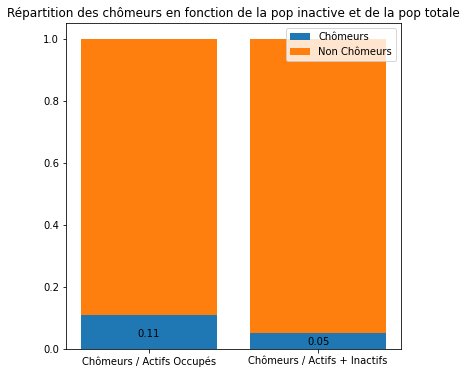

In [274]:
plt.figure(figsize=(6,6))

plt.bar(labels, inactive_rate, label="Chômeurs")
plt.bar(labels, non_inactive_rate, bottom=inactive_rate, label="Non Chômeurs")

plt.legend()
plt.title("Répartition des chômeurs en fonction de la pop inactive et de la pop totale")

plt.text(labels[0], 0.05, np.round(inactive_rate[0], 2), ha='center', va='center')
plt.text(labels[1], 0.025, np.round(inactive_rate[1], 2), ha='center', va='center')
plt.text(labels[0], 0.6, np.round(active_rate[0], 2), ha='center', va='center')
plt.text(labels[1], 0.6, np.round(active_rate[1], 2), ha='center', va='center')

plt.show()

Il semblerait que nous étions 11% de chômeurs parmi la population active (travailleuse) en France en 2017 selon le BIT

* En créant à nouveau un [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) , regardez cette fois la répartition de l'ancienneté du chômage. Le nom de la variable est ANCCHOM

In [114]:
# On renomme les catégories de notre colonne 
bar_df = chomage_df["ANCCHOM"].apply(lambda x: "Moins d'un mois" if x == 1
                                        else "De 1 mois à moins de 3 mois" if x == 2
                                        else "De 3 mois à moins de 6 mois" if x == 3
                                        else "De 6 mois à moins d'un an" if x == 4
                                        else "De 1 an à moins d'un an et demi" if x == 5
                                        else "De 1 an et demi à moins de 2 ans" if x == 6
                                        else "De 2 ans à moins de 3 ans" if x == 7
                                        else "3 ans ou plus" if x == 8
                                        else "NAN")

In [150]:
bar_df = bar_df.value_counts()
bar_df

NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: ANCCHOM, dtype: int64

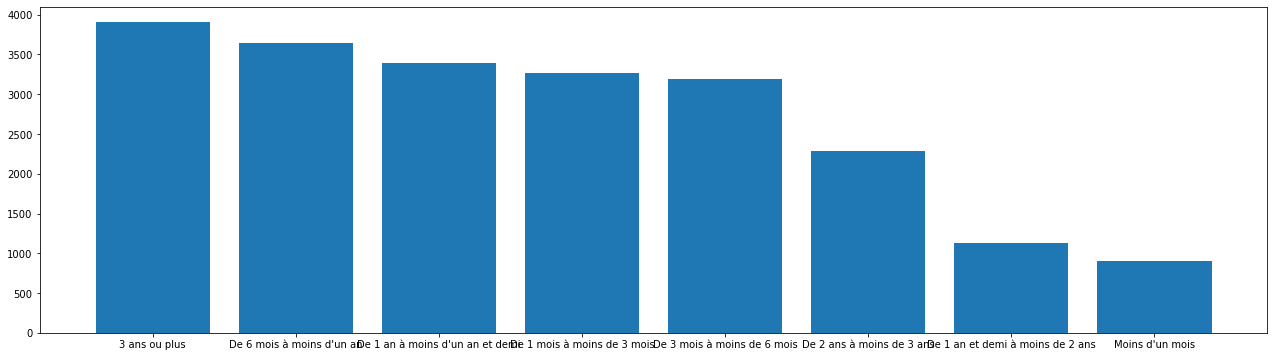

In [156]:
# On créé maintenant notre bar chart
plt.figure(figsize=(22,6))
plt.bar(bar_df.index[1:], bar_df[1:])
plt.show()

* La répartition se voit assez mal sur le *bar chart*, tentez de le refaire sur un *pie chart* 

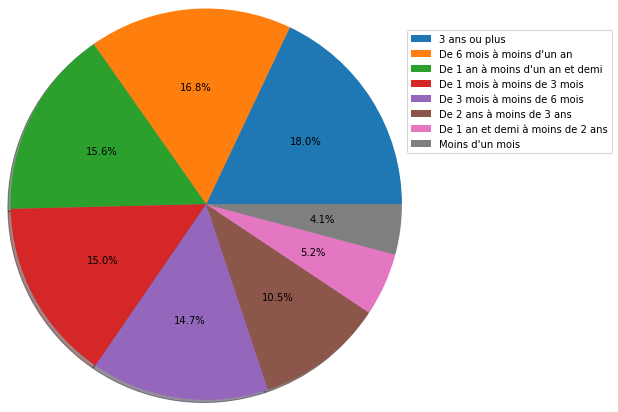

In [275]:
plt.figure(figsize=(22,6))
plt.pie(bar_df[1:], 
        autopct='%1.1f%%', 
        radius=1.5,
        shadow=True
       )
plt.legend(bar_df.index[1:], loc='best', bbox_to_anchor=(1.1,1.05))
plt.show()

* Il serait intéressant de voir la répartition des personnes inscrites à Pôle Emploi ou dans un organisme de placement parmi ces personnes au chômage. Regardez cette répartition grâce à la colonne CONTACT 
  * Enlevez directement les NaN de votre graphique

In [276]:
# On renomme les catégories de notre colonne 
pole_emploi_df = chomage_df["CONTACT"].apply(lambda x:"Oui" if x == 1
                                            else "Non" if x == 2
                                            else "NAN")
pole_emploi_df = pole_emploi_df.value_counts()
pole_emploi_df

NAN    399514
Non     15984
Oui     13144
Name: CONTACT, dtype: int64

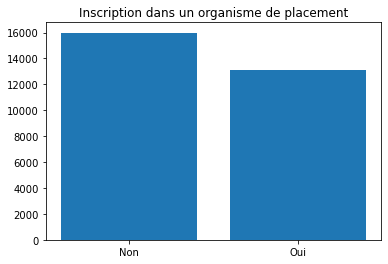

In [170]:
plt.bar(pole_emploi_df.index[1:], pole_emploi_df[1:])
plt.title("Inscription dans un organisme de placement")
plt.show()

* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français. 

In [181]:
chomage_df["CREACCP"].unique()

array([nan,  3.,  8.,  2., 11.,  6.,  7., 10.,  4.,  1.,  5., 13.,  9.,
       12.])

In [277]:
# On renomme les catégories de notre colonne 
quit_job_df = chomage_df["CREACCP"].apply(lambda x:"Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)" if x == 1
                                         else "Désire un emploi plus intéressant" if x == 2
                                         else "Veut un emploi plus stable (CDI)" if x == 3
                                         else "Veut travailler plus d'heures" if x == 4
                                         else "Désire un travail avec un rythme horaire plus adapté ou plus modulable" if x == 5
                                         else "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé" if x == 6
                                         else "Désire augmenter ses revenus" if x == 7
                                         else "Désire diminuer son temps de transport" if x == 8
                                         else "Doit ou veut déménager" if x == 9
                                         else "Veut s'installer à son compte" if x == 10
                                         else "Veut changer de métier ou de secteur" if x == 11
                                         else "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles" if x == 12
                                         else "Autre raison" if x == 13
                                         else "NAN")
quit_job_df = quit_job_df.value_counts(ascending=True)
quit_job_df

Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Autre raison                                                                             894
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                      

In [278]:
# Nous avons besoin de faire une répartition par pourcentage
# Calculons donc la répartition totale des répondants 
quit_job_total = quit_job_df[:-1].sum()
quit_job_total

22601

In [279]:
# Calculons maintenant la répartition de chacune des réponses 
quit_job_dist = [round(item/quit_job_total*100, 2) for item in quit_job_df[:-1].values]
quit_job_dist

[0.96, 1.57, 2.65, 3.96, 4.88, 5.41, 6.16, 6.21, 7.0, 8.05, 10.89, 12.3, 29.98]

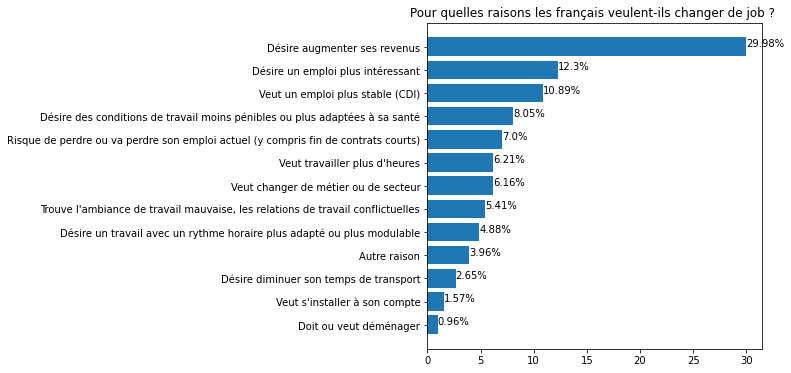

In [286]:
plt.figure(figsize=(6,6))
plt.barh(quit_job_df[:-1].index, quit_job_dist)
plt.title("Pour quelles raisons les français veulent-ils changer de job ? ")
for i in range(len(quit_job_dist)):
    plt.text(x=quit_job_dist[i], y=quit_job_df.index[:-1][i], s=str(quit_job_dist[i])+'%')
plt.show()

* Finissons cet exercice en regardant la distribution du nombre d'heures souhaitées pour les personnes qui cherchent un travail à temps partiel. Pour cela, utilisez la colonne HREC. 

  * Essayez tout d'abord de créer simplement un histogramme sans la fonction de densité 
  * Pour créer la fonction de densité, vous devrez utiliser la formule suivante : 
      ```y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))```
     
     où *mu* est la moyenne de la distribution et *sigma* est l'écart-type.  Vous pouvez vous aider de ce tutoriel [histogramme with Density](https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html)

c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


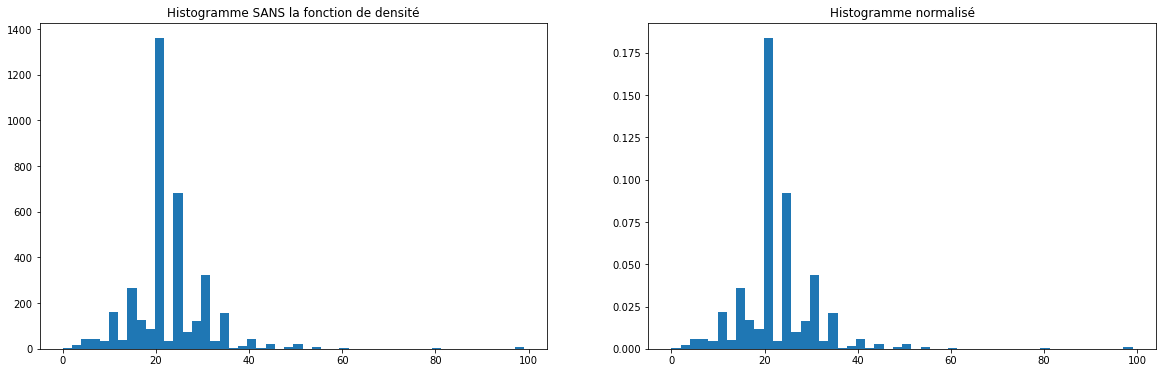

In [288]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.hist(chomage_df["HREC"], bins=50)
plt.title("Histogramme SANS la fonction de densité")

plt.subplot(122)
plt.hist(chomage_df["HREC"], bins=50, density=True)
plt.title("Histogramme normalisé")

plt.show()

c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\imed\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


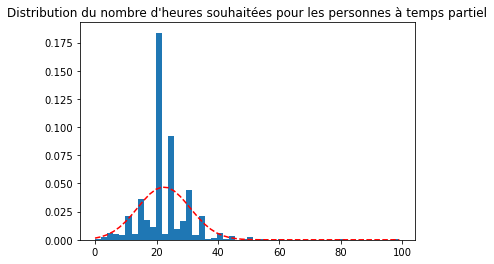

In [289]:
# Création de l'histogramme
## On stocke dans trois variables différentes le résultats de plt.hist dans n, bins et patches

n, bins, patches = plt.hist(chomage_df["HREC"], bins=50, density=True)

# Formule pour la densité
mu = chomage_df["HREC"].mean()
sigma = chomage_df["HREC"].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# Ajout d'un line plot
plt.plot(bins, y, color="r",linestyle="--")
plt.title("Distribution du nombre d'heures souhaitées pour les personnes à temps partiel")
plt.show()